In [1]:
#Load dependencies: 
import pandas as pd
from pathlib import Path 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import os

#read csv file: 
filepath=Path('CATSA flight info - Sheet1 (1).csv')

#convert csv to dataframe: 
flight_df=pd.read_csv(filepath)
flight_df.head()

,Date,Total Number of Passengers Screened,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,Eight Largest Airports (note 1),NaN,NaN,NaN,NaN,Seventeen Largest Airports (note 2),NaN,NaN,NaN,NaN
1,NaN,2023,2022,2021,2020,2019,2023,2022,2021,2020,2019
2,2023-01-01,"147,357.00","82,278.00","36,788.00","167,771.00","163,408.00","165,797.00","91,703.00","40,567.00","188,075.00","182,370.00"
3,2023-01-02,"156,934.00","79,100.00","27,425.00","157,641.00","144,461.00","178,235.00","88,616.00","31,085.00","173,503.00","160,526.00"
4,2023-01-03,"143,741.00","72,224.00","20,049.00","139,711.00","135,122.00","162,399.00","80,036.00","22,261.00","155,980.00","150,842.00"


In [2]:
# Set the first row as column headers
flight_df.columns = flight_df.iloc[0]

#rename columns
new_column_names = [
    'Date',
    '2023 - 8 Largest Airports',
    '2022 - 8 Largest Airports',
    '2021 - 8 Largest Airports',
    '2020 - 8 Largest Airports',
    '2019 - 8 Largest Airports',
    '2023 - 17 Largest Airports',
    '2022 - 17 Largest Airports',
    '2021 - 17 Largest Airports',
    '2020 - 17 Largest Airports',
    '2019 - 17 Largest Airports',
    ]

flight_df.columns = new_column_names

# Display the cleaned DataFrame
flight_df

,Date,2023 - 8 Largest Airports,2022 - 8 Largest Airports,2021 - 8 Largest Airports,2020 - 8 Largest Airports,2019 - 8 Largest Airports,2023 - 17 Largest Airports,2022 - 17 Largest Airports,2021 - 17 Largest Airports,2020 - 17 Largest Airports,2019 - 17 Largest Airports
0,NaN,Eight Largest Airports (note 1),NaN,NaN,NaN,NaN,Seventeen Largest Airports (note 2),NaN,NaN,NaN,NaN
1,NaN,2023,2022,2021,2020,2019,2023,2022,2021,2020,2019
2,2023-01-01,"147,357.00","82,278.00","36,788.00","167,771.00","163,408.00","165,797.00","91,703.00","40,567.00","188,075.00","182,370.00"
3,2023-01-02,"156,934.00","79,100.00","27,425.00","157,641.00","144,461.00","178,235.00","88,616.00","31,085.00","173,503.00","160,526.00"
4,2023-01-03,"143,741.00","72,224.00","20,049.00","139,711.00","135,122.00","162,399.00","80,036.00","22,261.00","155,980.00","150,842.00"
...,...,...,...,...,...,...,...,...,...,...,...
362,2023-12-27,NaN,"155,743.00","79,179.00","24,043.00","154,945.00",NaN,"174,948.00","88,875.00","26,699.00","172,445.00"
363,2023-12-28,NaN,"156,923.00","81,032.00","17,141.00","161,841.00",NaN,"178,272.00","90,485.00","18,855.00","181,429.00"
364,2023-12-29,NaN,"157,831.00","71,467.00","19,852.00","168,476.00",NaN,"178,412.00","80,776.00","21,541.00","187,377.00"
365,2023-12-30,NaN,"137,373.00","69,622.00","30,913.00","162,485.00",NaN,"154,020.00","77,109.00","33,807.00","180,131.00"


In [3]:
#Make new DF with data from 01/01 - 12/03 to ensure even comparison across all years

# Replace 'start_date' and 'end_date' with your desired date range
start_date = '2023-01-01'
end_date = '2023-12-03'

# Convert the "Date" column to a datetime object if it's not already
flight_df['Date'] = pd.to_datetime(flight_df['Date'], errors='coerce')

# Filter rows based on the specified date range
filtered_df = flight_df[(flight_df['Date'] >= start_date) & (flight_df['Date'] <= end_date)]

# Display the resulting DataFrame
filtered_df


,Date,2023 - 8 Largest Airports,2022 - 8 Largest Airports,2021 - 8 Largest Airports,2020 - 8 Largest Airports,2019 - 8 Largest Airports,2023 - 17 Largest Airports,2022 - 17 Largest Airports,2021 - 17 Largest Airports,2020 - 17 Largest Airports,2019 - 17 Largest Airports
2,2023-01-01,"147,357.00","82,278.00","36,788.00","167,771.00","163,408.00","165,797.00","91,703.00","40,567.00","188,075.00","182,370.00"
3,2023-01-02,"156,934.00","79,100.00","27,425.00","157,641.00","144,461.00","178,235.00","88,616.00","31,085.00","173,503.00","160,526.00"
4,2023-01-03,"143,741.00","72,224.00","20,049.00","139,711.00","135,122.00","162,399.00","80,036.00","22,261.00","155,980.00","150,842.00"
5,2023-01-04,"141,105.00","70,459.00","21,979.00","136,000.00","134,642.00","156,873.00","78,078.00","24,217.00","150,524.00","149,677.00"
6,2023-01-05,"138,590.00","64,980.00","20,212.00","140,528.00","138,792.00","156,539.00","71,277.00","22,116.00","155,494.00","155,343.00"
...,...,...,...,...,...,...,...,...,...,...,...
334,2023-11-29,"125,509.00","113,633.00","66,349.00","17,089.00","127,297.00","139,285.00","125,289.00","73,641.00","18,565.00","141,641.00"
335,2023-11-30,"141,115.00","127,706.00","72,272.00","17,283.00","137,612.00","157,739.00","143,269.00","80,948.00","18,900.00","153,844.00"
336,2023-12-01,"149,539.00","130,636.00","78,257.00","22,573.00","143,593.00","166,384.00","145,988.00","87,374.00","24,446.00","159,791.00"
337,2023-12-02,"123,151.00","113,192.00","64,984.00","23,763.00","122,800.00","134,939.00","125,215.00","71,730.00","25,230.00","134,058.00"


## Analysis by Year Totals

In [4]:
# #Create sum totals for each column

#Create new df with date column removed
df_numeric = filtered_df.drop("Date", axis=1)
df_numeric = df_numeric.applymap(lambda x: pd.to_numeric(str(x).replace(',', '').replace('.', ''), errors='coerce'))
df_numeric


# Sum the remaining columns
topairports_2023 = (df_numeric["2023 - 8 Largest Airports"].sum())
topairports_2022 = (df_numeric["2022 - 8 Largest Airports"].sum())
topairports_2021 = (df_numeric["2021 - 8 Largest Airports"].sum())
topairports_2020 = (df_numeric["2020 - 8 Largest Airports"].sum())
topairports_2019 = (df_numeric["2019 - 8 Largest Airports"].sum())
moreairports_2023 = (df_numeric["2023 - 17 Largest Airports"].sum())
moreairports_2022 = (df_numeric["2022 - 17 Largest Airports"].sum())
moreairports_2021 = (df_numeric["2021 - 17 Largest Airports"].sum())
moreairports_2020 = (df_numeric["2020 - 17 Largest Airports"].sum())
moreairports_2019 = (df_numeric["2019 - 17 Largest Airports"].sum())


In [5]:
# Convert the Series to a DataFrame

#Create a dictionary
passenger_sum_dict =  {
    '2023 - Top 8 Airports': [topairports_2023],
    '2022 - Top 8 Airports': [topairports_2022],
    '2021 - Top 8 Airports': [topairports_2021],
    '2020 - Top 8 Airports': [topairports_2020],
    '2019 - Top 8 Airports': [topairports_2019],
    '2023 - Top 17 Airports': [moreairports_2023],
    '2022 - Top 17 Airports': [moreairports_2022],
    '2021 - Top 17 Airports': [moreairports_2021],
    '2020 - Top 17 Airports': [moreairports_2020],
    '2019 - Top 17 Airports': [moreairports_2019],
}

passenger_sum = pd.DataFrame(passenger_sum_dict)


# Display the DataFrame
passenger_sum

,2023 - Top 8 Airports,2022 - Top 8 Airports,2021 - Top 8 Airports,2020 - Top 8 Airports,2019 - Top 8 Airports,2023 - Top 17 Airports,2022 - Top 17 Airports,2021 - Top 17 Airports,2020 - Top 17 Airports,2019 - Top 17 Airports
0,5048829600,3798214400,1309015400,1417625800,5192174900,5653407200,4201142300,1456942600,1576952600,5762940700


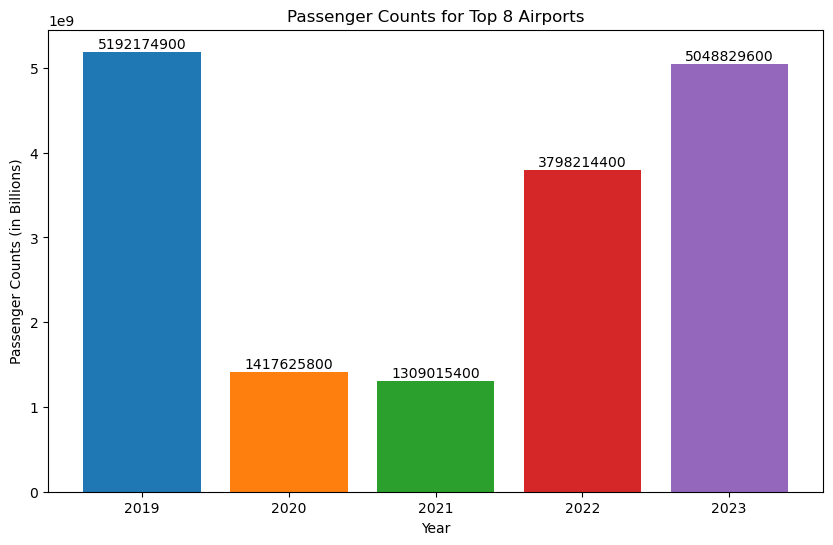

In [8]:
#grab Top 8 Airports columns: 
columns_graph1 = ['2019 - Top 8 Airports', '2020 - Top 8 Airports', '2021 - Top 8 Airports', '2022 - Top 8 Airports', '2023 - Top 8 Airports']


# plot the data on a bar graph
labels_graph1 = ['2019', '2020', '2021', '2022', '2023']
colors = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple')

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(columns_graph1)), passenger_sum[columns_graph1].iloc[0], tick_label=labels_graph1, color=colors, label='Passenger Counts')

# Add data labels to each bar
for bar, label in zip(bars, passenger_sum[columns_graph1].iloc[0]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label}', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Passenger Counts (in Billions)')
plt.title('Passenger Counts for Top 8 Airports')

# Save the bar plot as an image by providing a filename
output_directory = 'output'
os.makedirs(output_directory, exist_ok=True)
output_filename = os.path.join(output_directory, 'Screened_Passengers_Top_8_Airports.png')  # Provide a valid filename

# Save the figure with bbox_inches='tight'
plt.savefig(output_filename, bbox_inches='tight')

# Show the plot
plt.show()

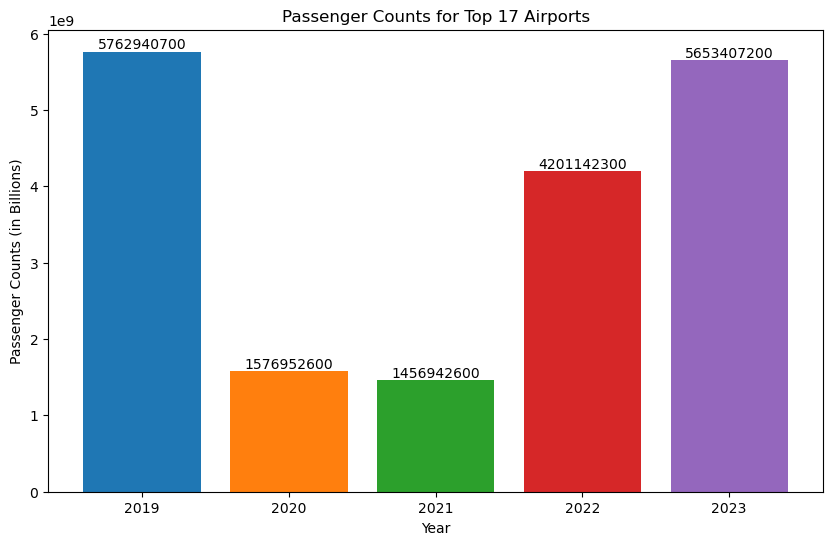

In [7]:
# grab Top 8 Airports columns
columns_graph2 = ['2019 - Top 17 Airports', '2020 - Top 17 Airports', '2021 - Top 17 Airports', '2022 - Top 17 Airports', '2023 - Top 17 Airports']

# plot the data on a bar graph
labels_graph2 = ['2019', '2020', '2021', '2022', '2023']
colors = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple')

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(columns_graph2)), passenger_sum[columns_graph2].iloc[0], tick_label=labels_graph2, color=colors, label='Passenger Counts')

# Add data labels to each bar
for bar, label in zip(bars, passenger_sum[columns_graph2].iloc[0]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label}', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Passenger Counts (in Billions)')
plt.title('Passenger Counts for Top 17 Airports')

# Save the bar plot as an image by providing a filename
output_directory = 'output'
os.makedirs(output_directory, exist_ok=True)
output_filename = os.path.join(output_directory, 'Screened_Passengers_Top_17_Airports.png')  # Provide a valid filename

# Save the figure with bbox_inches='tight'
plt.savefig(output_filename, bbox_inches='tight')

# Show the plot
plt.show()

